# A Combined Implementation

Combine the Naive and Search approach.

In [1]:
import random
from typing import Generator
from math import comb


def find_min_value_given_probability(N, n, target_probability):
    # Calculate the total combinations for the sample
    total_combinations = comb(N, n)
    
    # Iterate to find the m that matches the target probability
    for m in range(1, N - n + 2):
        current_combination = comb(N - m, n - 1)
        probability = current_combination / total_combinations
        
        if probability >= target_probability:
            return m

        target_probability -= probability
    
    # If no exact match is found, return the last m
    return m


def generate_unique_random_numbers_search(min_num: int, max_num: int, batch_size: int) -> Generator[int, None, None]:
    if max_num - min_num + 1 < batch_size:
        raise ValueError("Range is too small to generate the requested number of unique random numbers.")

    n = batch_size

    while n > 0:
        N = max_num - min_num + 1
        random_probability = random.random()
        m = find_min_value_given_probability(N, n, random_probability)
        number = min_num + m - 1
        min_num = number + 1
        n -= 1
        yield number


def generate_unique_random_numbers_naive(min_num: int, max_num: int, batch_size: int) -> Generator[int, None, None]:
    N = max_num - min_num + 1
    
    if N < batch_size:
        raise ValueError("Range is too small to generate the requested number of unique random numbers.")
    
    unique_numbers = set()

    while len(unique_numbers) < batch_size:
        number = random.randint(min_num, max_num)
        if number not in unique_numbers:
            unique_numbers.add(number)
            yield number


def generate_unique_random_numbers(min_num: int, max_num: int, batch_size: int) -> Generator[int, None, None]:
    N = max_num - min_num + 1
    
    if N < batch_size:
        raise ValueError("Range is too small to generate the requested number of unique random numbers.")

    if batch_size == 0 or batch_size / N <= 0.99:
        return generate_unique_random_numbers_naive(min_num, max_num, batch_size)
    else:
        return generate_unique_random_numbers_search(min_num, max_num, batch_size)

In [2]:
list(generate_unique_random_numbers(0, 9, 3))

[6, 2, 4]

## Distribution

We can run it multiple times and plot the results to convince ourselves that it is evenly distributed.

Chi-Square Statistic: 4.326666666666666
P-Value: 0.8886275970472509


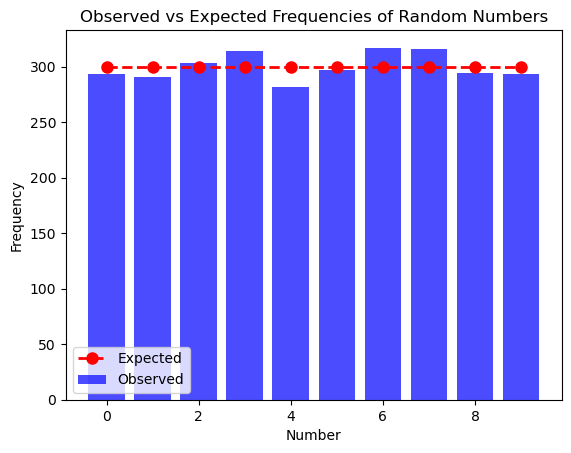

In [3]:
import run

run.plot(generate_unique_random_numbers, 0, 9, 3, 1000)

## Execution Time

The downside to this implementation is that the runtime is non-deterministic and gets very bad as the batch size approaches the range size (i.e. batch percentage).

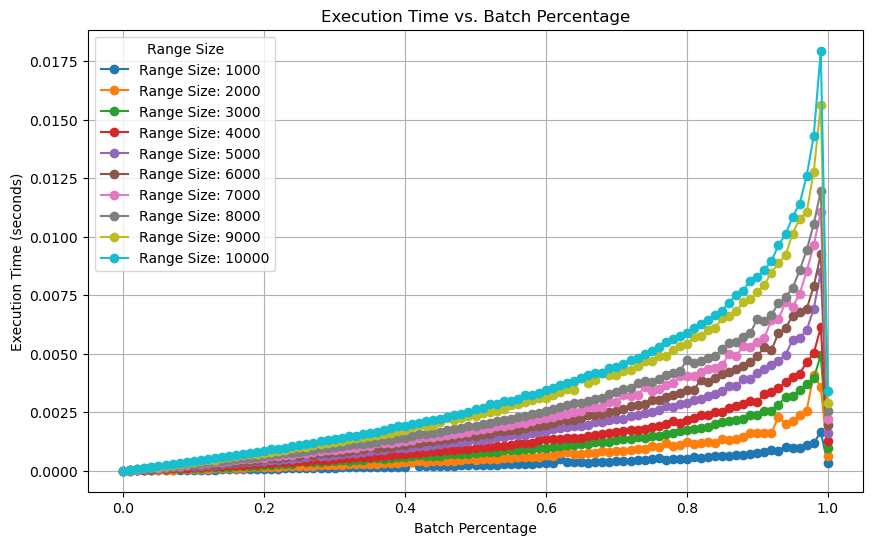

In [4]:
import plot

df = run.measure_time(lambda range_size, batch_size: generate_unique_random_numbers(1, range_size, batch_size), iterations=1, percentage_range=range(0, 101, 1))
plot.execution_time(df)

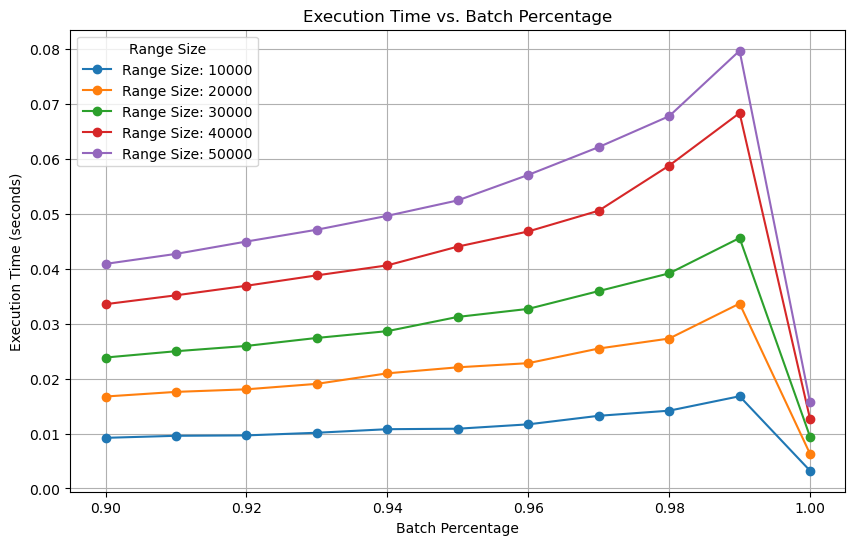

In [5]:
df = run.measure_time(lambda range_size, batch_size: generate_unique_random_numbers(1, range_size, batch_size), size_range=range(10000,50001,10000), iterations=1, percentage_range=range(90, 101, 1))
plot.execution_time(df)

## Memory Usage

The memory usage is linear relative to the batch size.